# EDA

In [1]:
# !pip install category_encoders
# !pip install hyperopt
# !pip install xgboost==1.6.2
# !pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 712 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 29 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.0 MB/s 
     |████████████████████████████████| 133 kB 55.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=7f07a35a515eef245bc8dbdec765b913f53a106397e0af9f145d4ba60c0a78f8
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20f

In [2]:
import xgboost as xgb
xgb.__version__

'1.6.2'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

GENDER : M [Male] , F [Female]

AGE : Age of patients

SMOKING : 2 [Yes] , 1 [No]

YELLOW_FINGERS : 2 [Yes] , 1 [No]

ANXIETY : 2 [Yes] , 1 [No]

PEER_PRESSURE : 2 [Yes] , 1 [No]

CHRONIC DISEASE : 2 [Yes] , 1 [No]

FATIGUE : 2 [Yes] , 1 [No]

ALLERGY : 2 [Yes] , 1 [No]

WHEEZING : 2 [Yes] , 1 [No]

ALCOHOL CONSUMING : 2 [Yes] , 1 [No]

COUGHING : 2 [Yes] , 1 [No]

SHORTNESS OF BREATH : 2 [Yes] , 1 [No]

SWALLOWING DIFFICULTY : 2 [Yes] , 1 [No]

CHEST PAIN : 2 [Yes] , 1 [No]

LUNG_CANCER : YES [Positive] , NO [Negative]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CodeStates/project/section2/survey lung cancer.csv")
data1=data.copy()

In [7]:
print(f"Shape of The Dataset : {data.shape}")
print(f"\n\nGlimpse of The Dataset :\n")
data.head()


Shape of The Dataset : (309, 16)


Glimpse of The Dataset :



,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [8]:
print(f"Informations About The Dataset :\n")
print(data.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    i

In [9]:
print(f"Summary of This Dataset :\n")
data.describe().T

Summary of This Dataset :



,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [10]:
data.describe(include=object).T


,count,unique,top,freq
GENDER,309,2,M,162
LUNG_CANCER,309,2,YES,270


In [11]:
data.isna().sum()


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [12]:
data['LUNG_CANCER'].value_counts() #class 불균형 문제. 270 39

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [13]:
data[data.duplicated()].shape #33개 duplicated

(33, 16)

In [14]:
data.drop_duplicates(keep='first',inplace=True)# duplicated제거


In [ ]:
# Exploring Positive Lung Cancer Cases
# data_temp = data.copy()
# data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
# data_temp_pos.head()

# visualization

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CodeStates/project/section2/survey lung cancer.csv")
# data.drop_duplicates(keep='first',inplace=True)
# sns.set_style("whitegrid")
# sns.set_context("poster",font_scale = .7)

# palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]
# data_temp = data.copy()
# data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

# for column in data_temp.columns:
#     data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})
# data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]

In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
import seaborn as sns
sns.set_palette('deep')

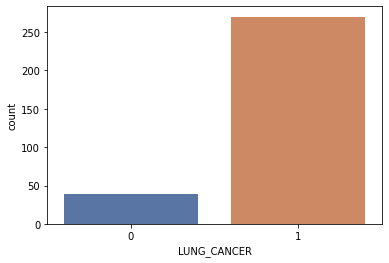

In [ ]:
sns.countplot(data=df, x = 'LUNG_CANCER')

In [ ]:
df.LUNG_CANCER.value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [ ]:
df.SMOKING.value_counts(normalize=True)

2    0.563107
1    0.436893
Name: SMOKING, dtype: float64

In [ ]:
df[df.LUNG_CANCER==0].SMOKING.value_counts(normalize=True)

1    0.512821
2    0.487179
Name: SMOKING, dtype: float64

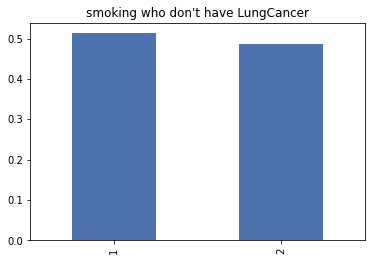

In [ ]:
df[df.LUNG_CANCER==0].SMOKING.value_counts(normalize=True). plot.bar( title="smoking who don't have LungCancer",  )

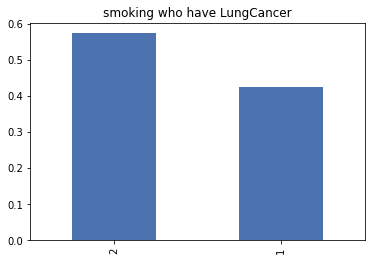

In [ ]:
df[df.LUNG_CANCER==1].SMOKING.value_counts(normalize=True). plot.bar( title="smoking who have LungCancer")

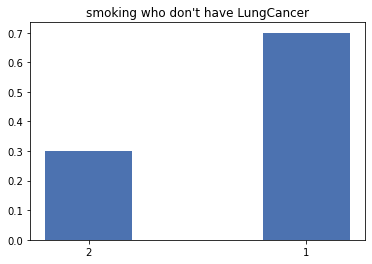

In [ ]:
x = np.arange(2)
values = [0.3, 0.7]
numbs = ['2','1']
plt.bar(x,values, width=0.4)
plt.xticks(x,numbs)
plt.title("smoking who don't have LungCancer")

plt.show()

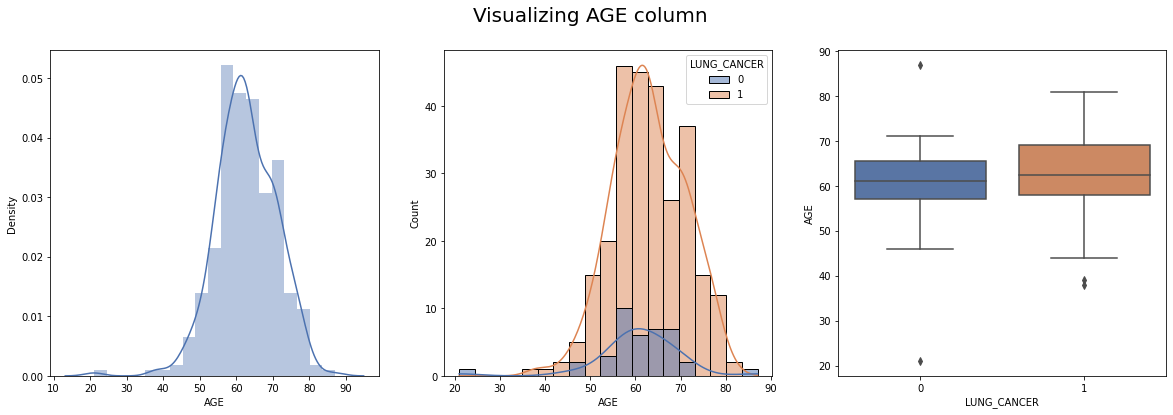

In [ ]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

(타겟 데이터가 1에 편향된 불균형 분포

lungcancer=1은 평균 age가 높고 age 범위가 넓음)

Text(0.5, 0.98, 'Visualizing Categorical Columns')

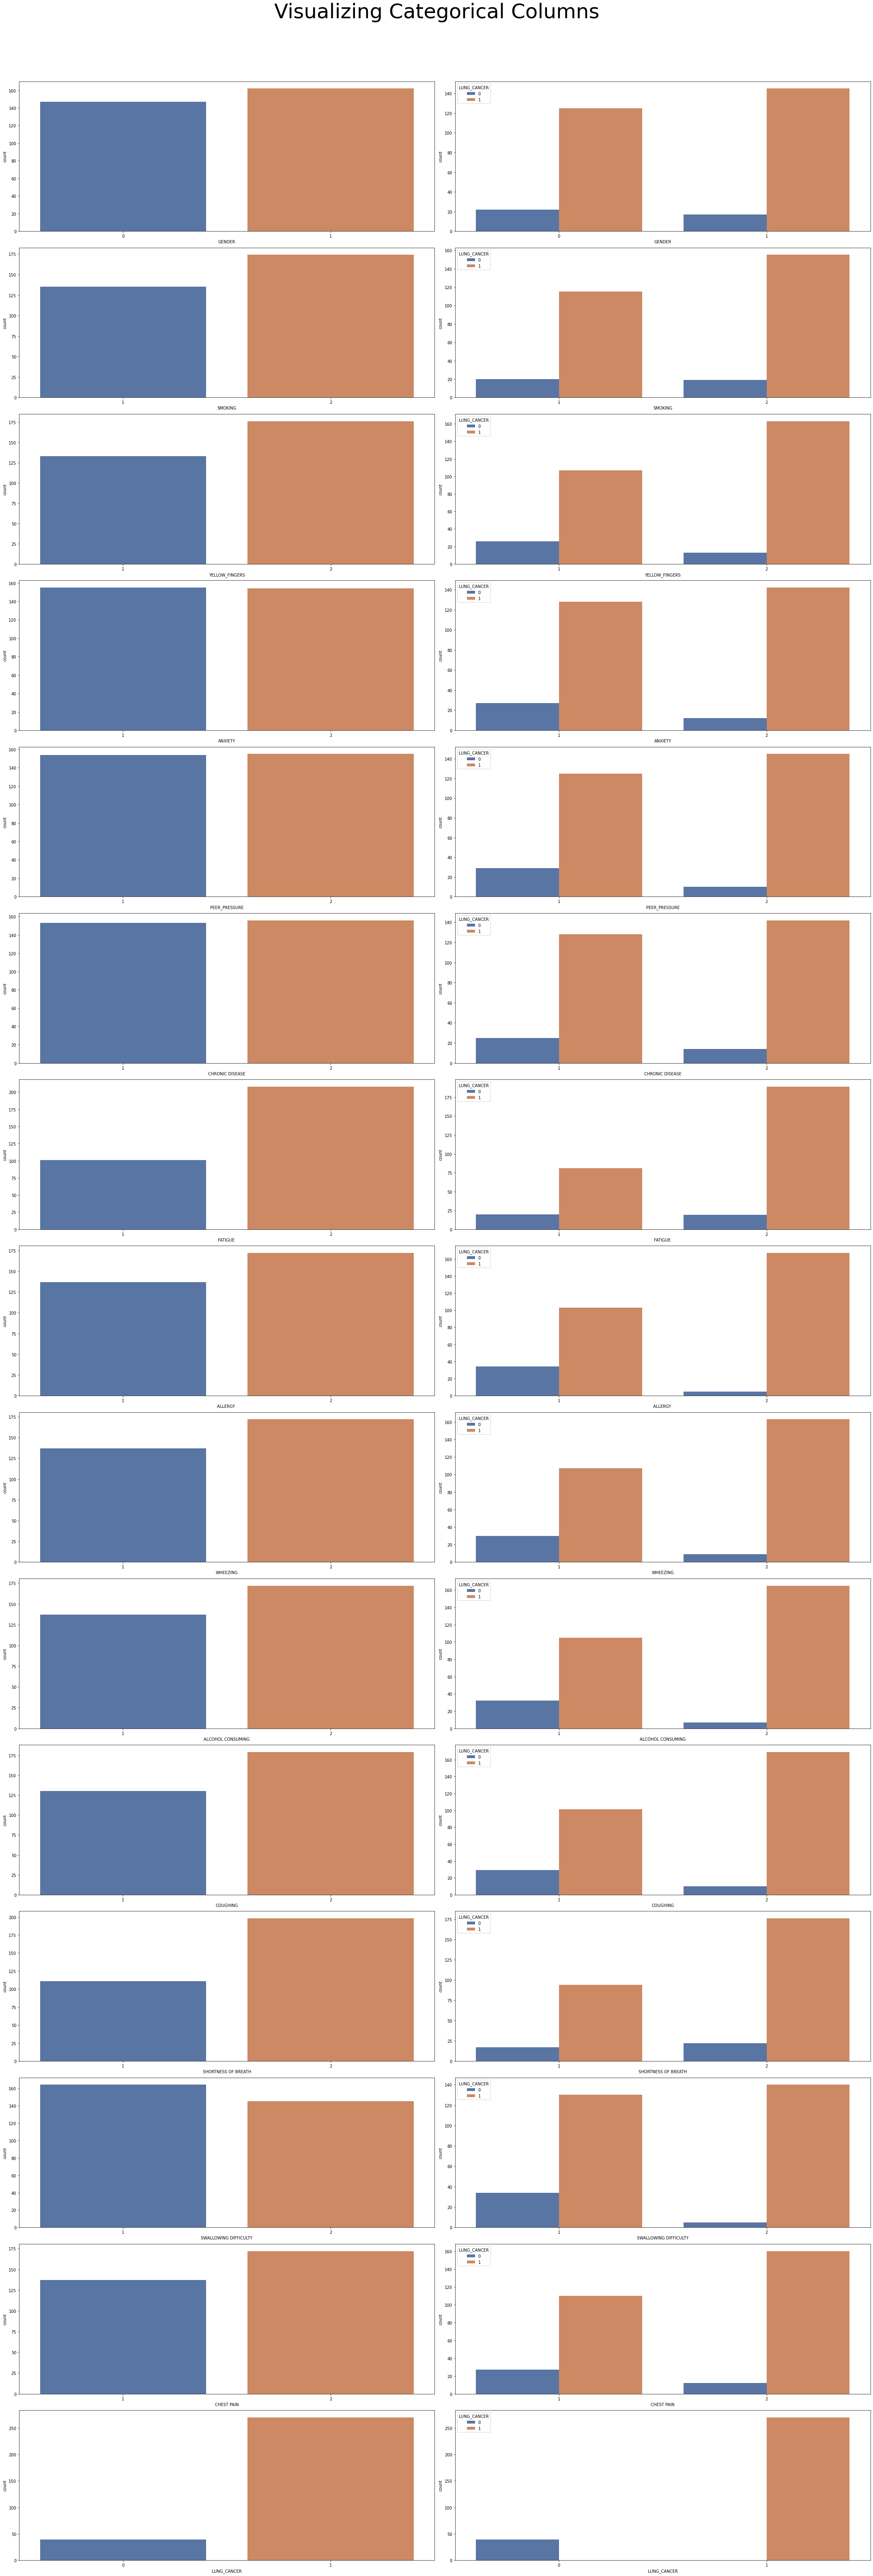

In [ ]:

fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)


In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
import pandas as pd
import seaborn as sns

def plotting_percentages(df, col, target):
    x, y = col, target
    # Temporary dataframe with percentage values
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt,size=40)
        
    # Set labels and title

    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 20})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

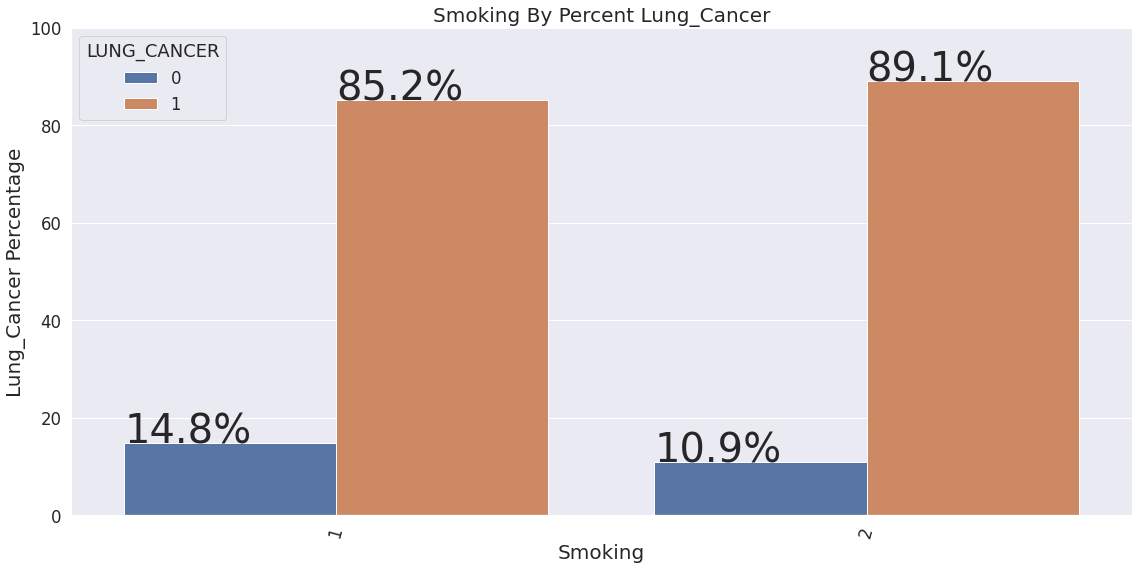

In [ ]:
plotting_percentages(df, 'SMOKING', 'LUNG_CANCER')

ValueError: ignored

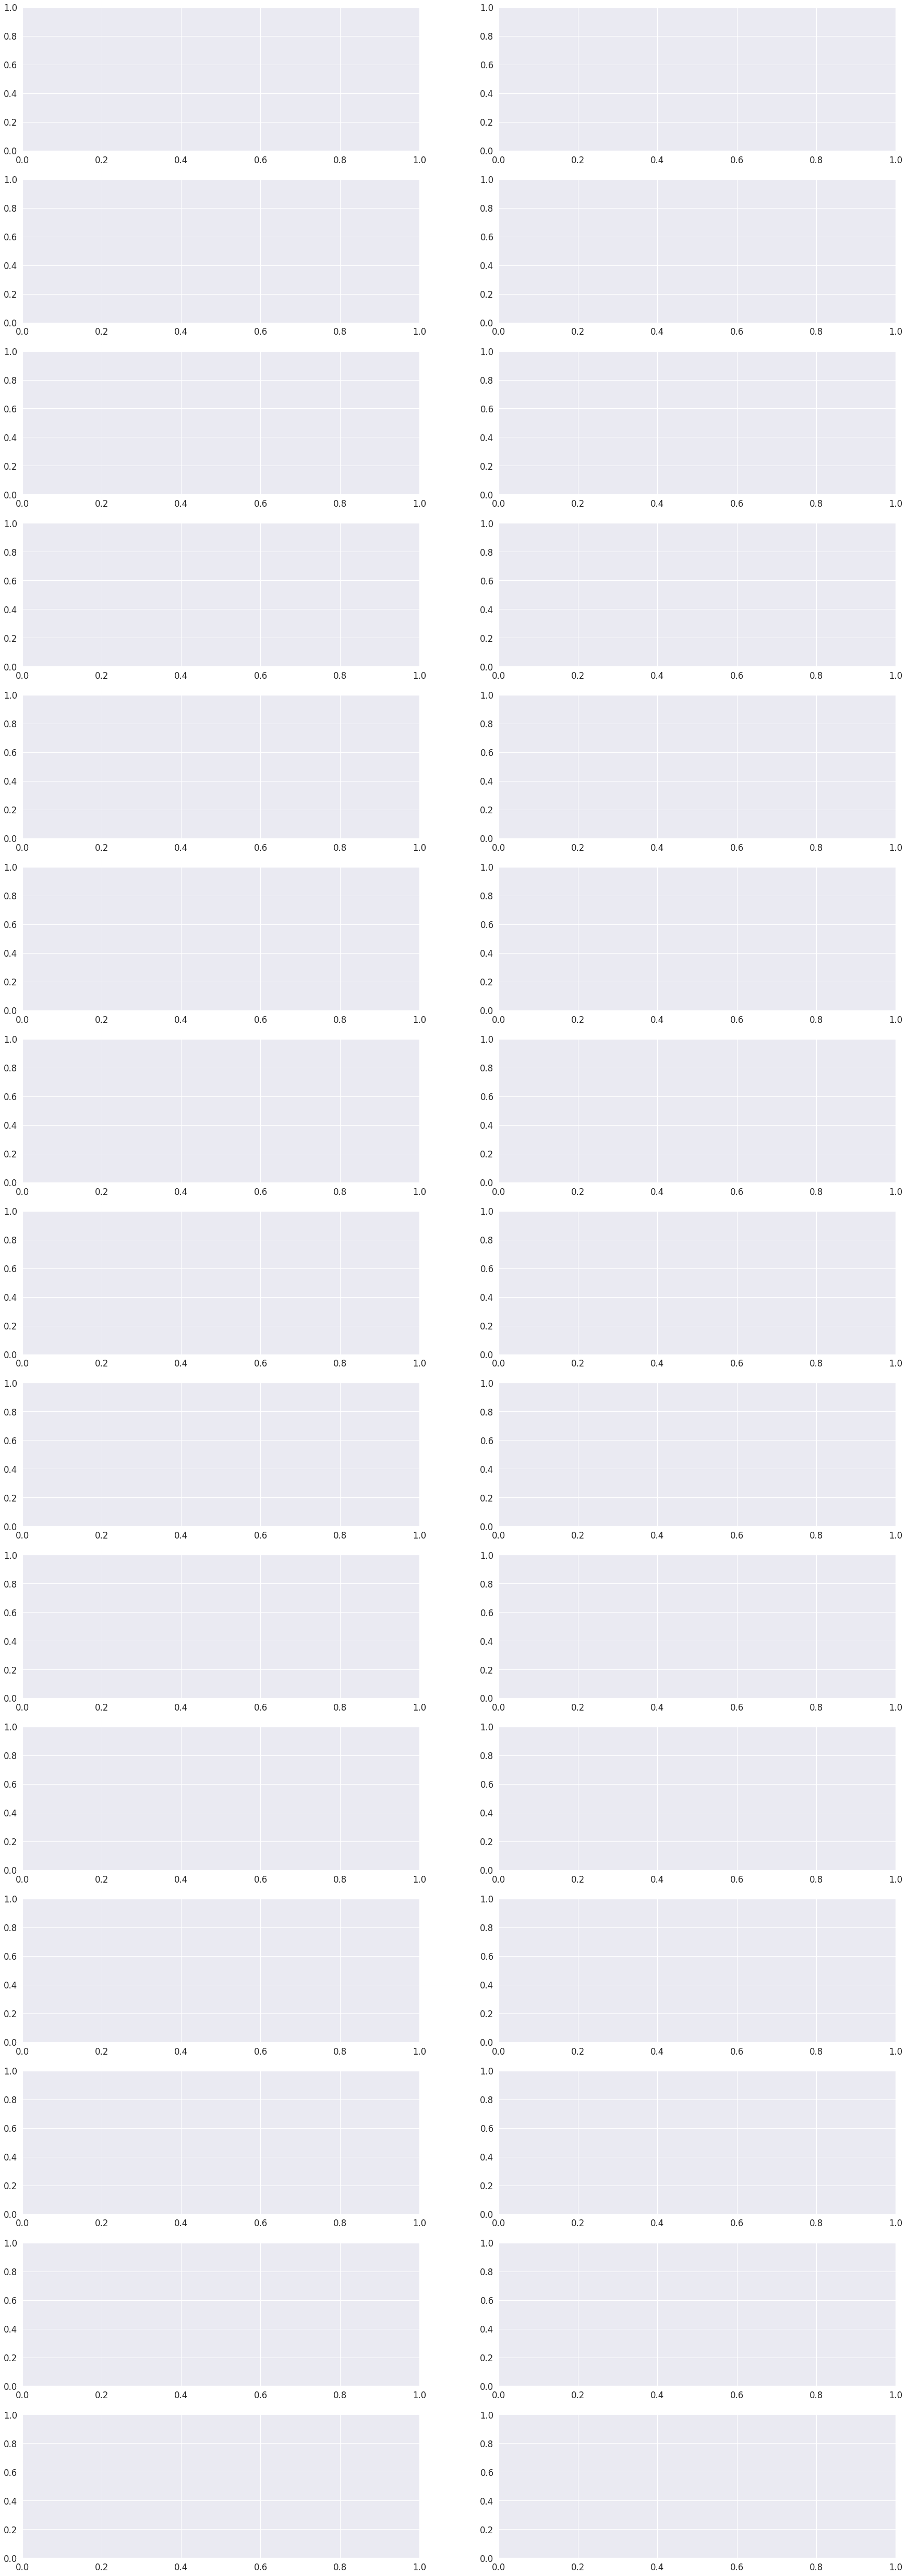

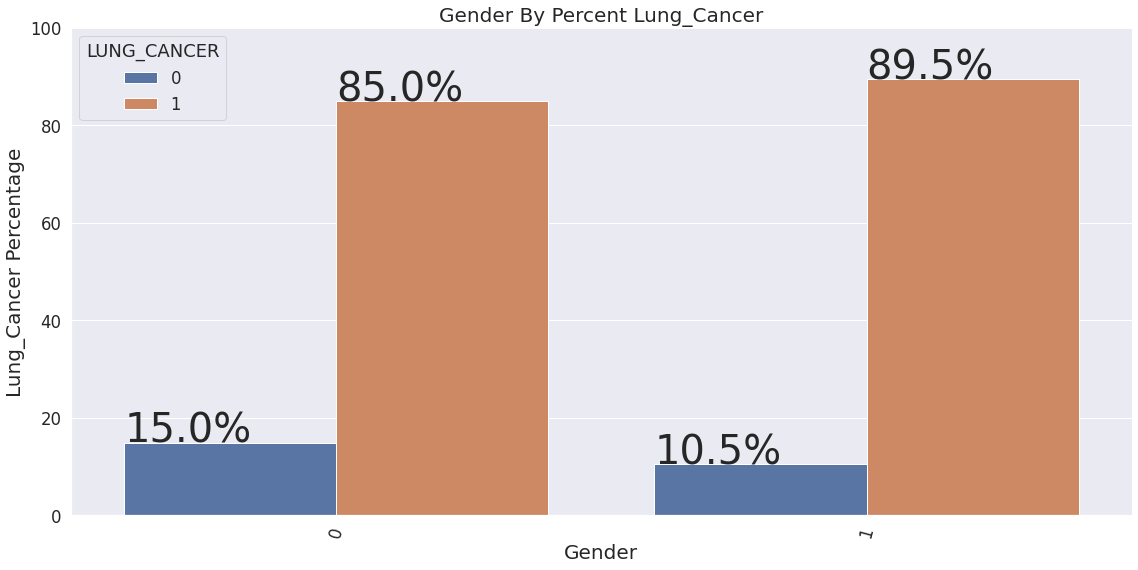

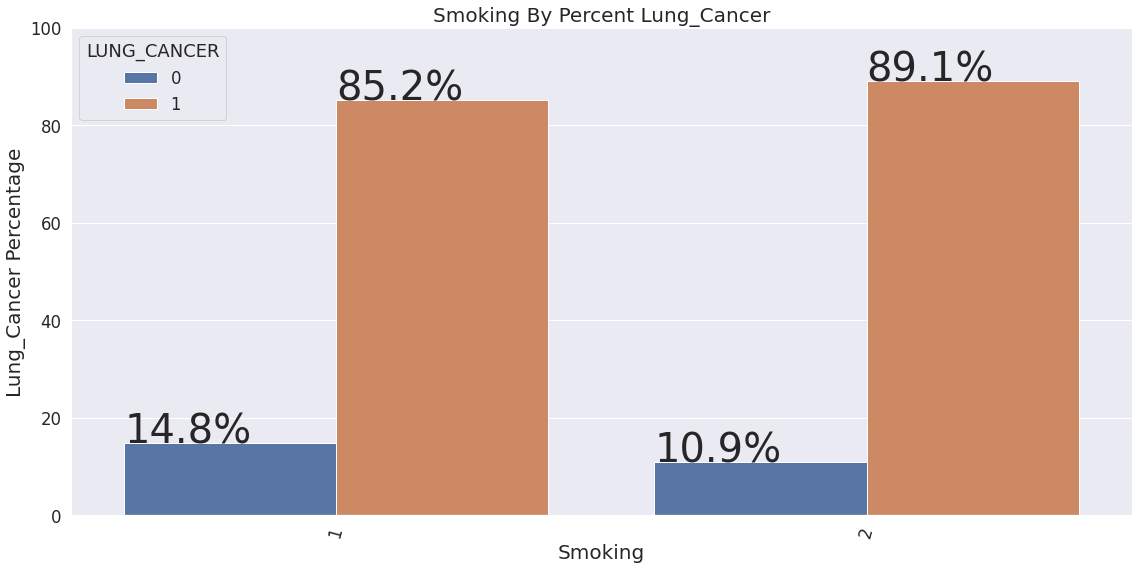

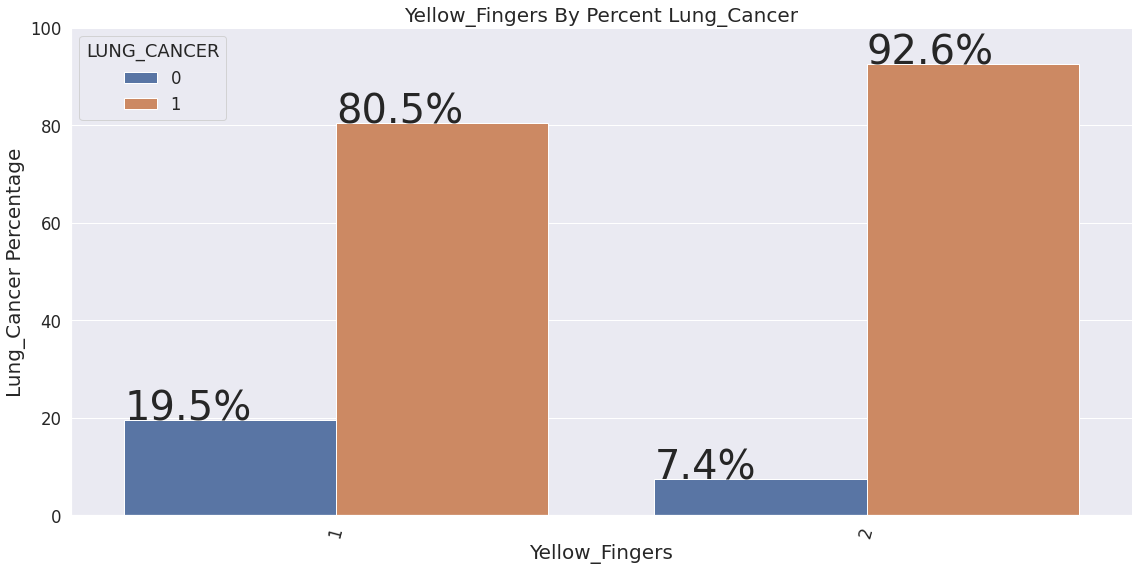

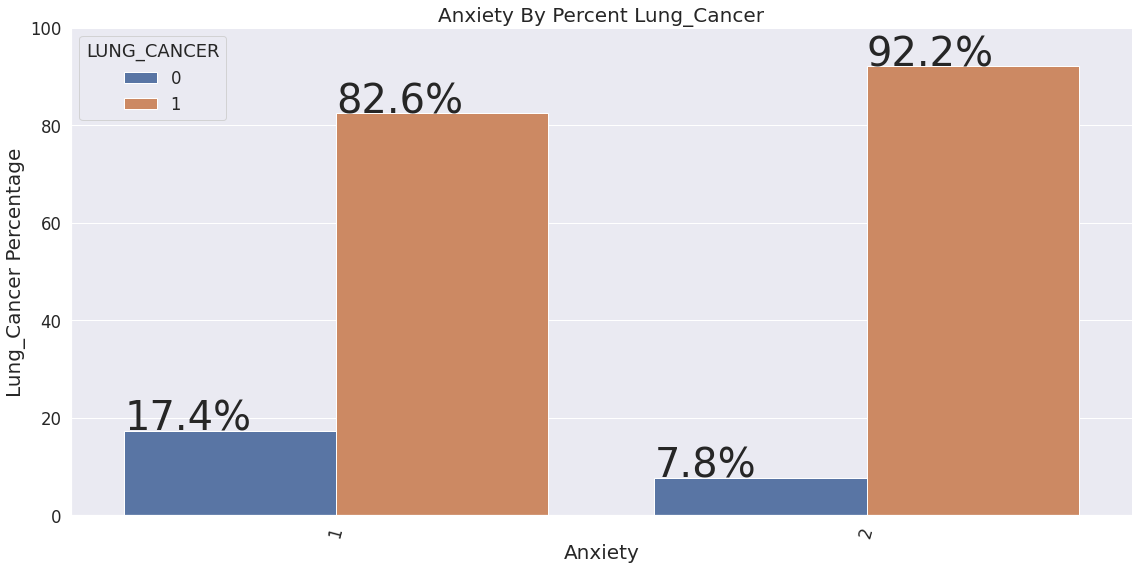

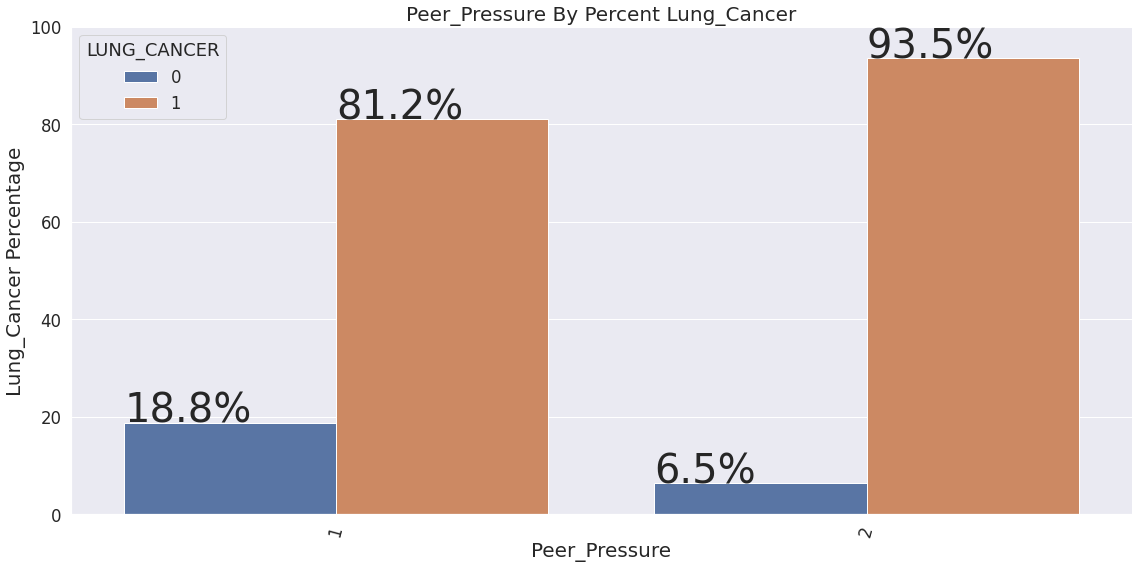

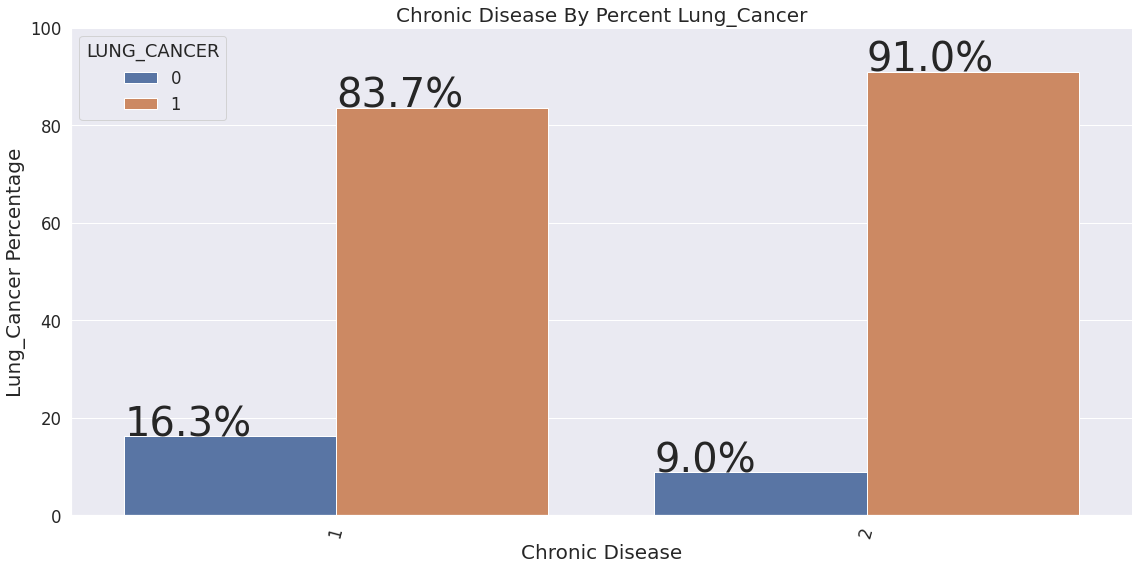

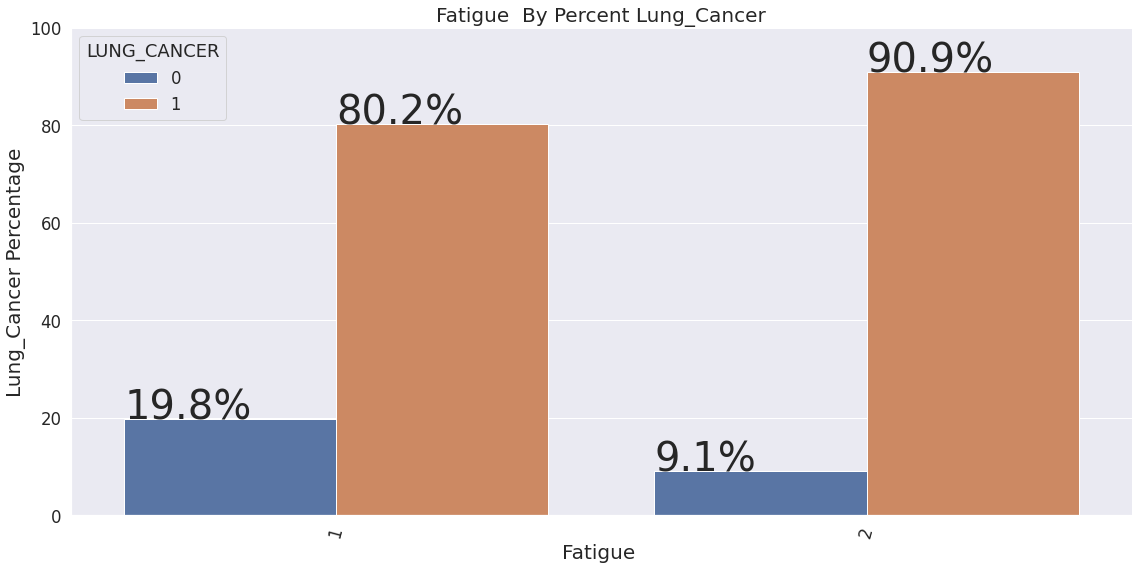

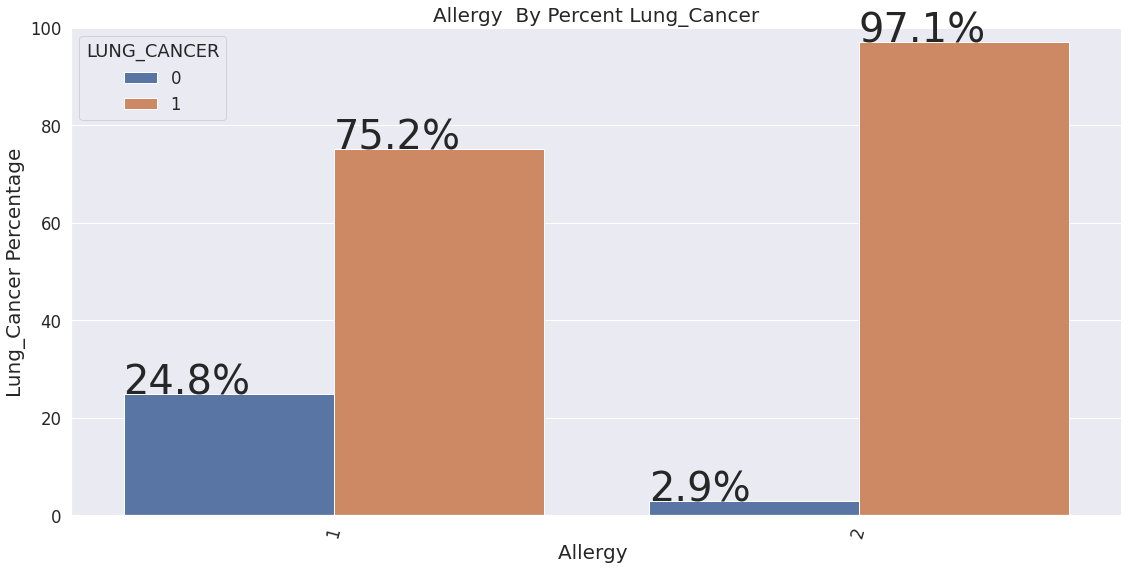

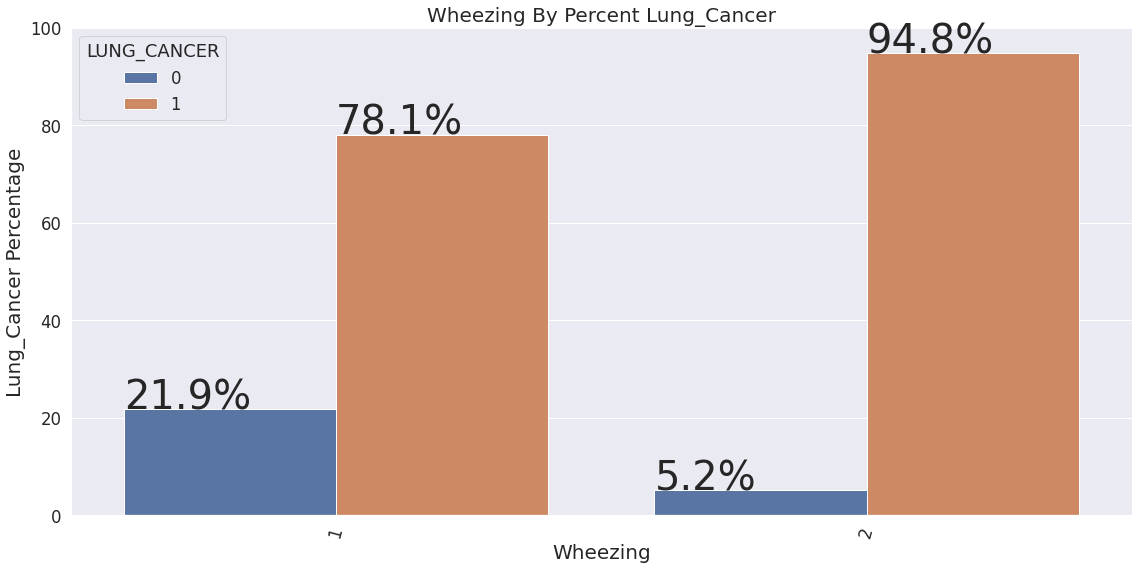

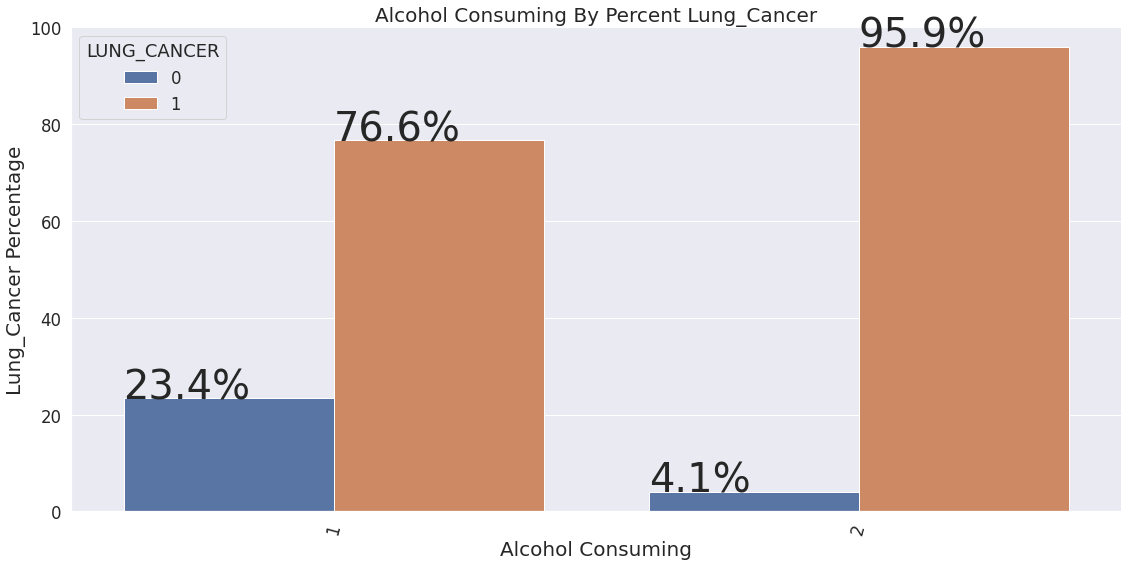

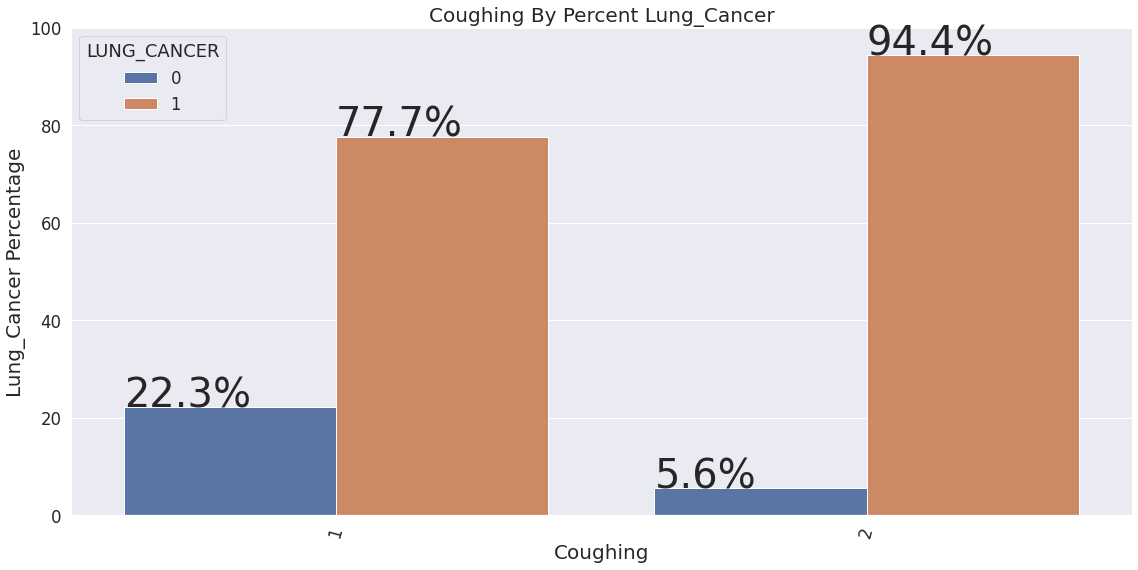

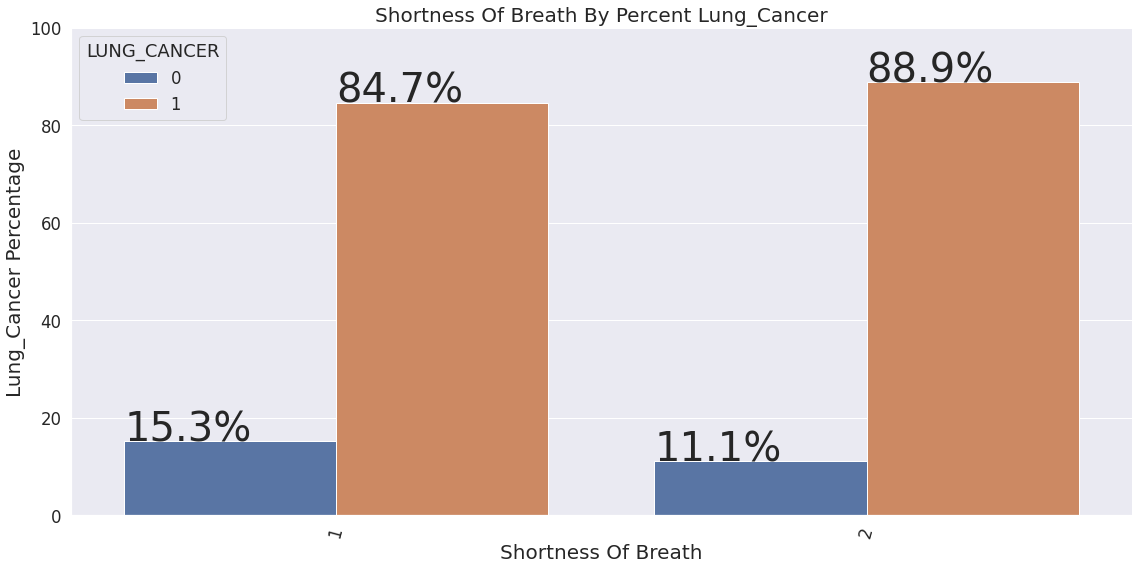

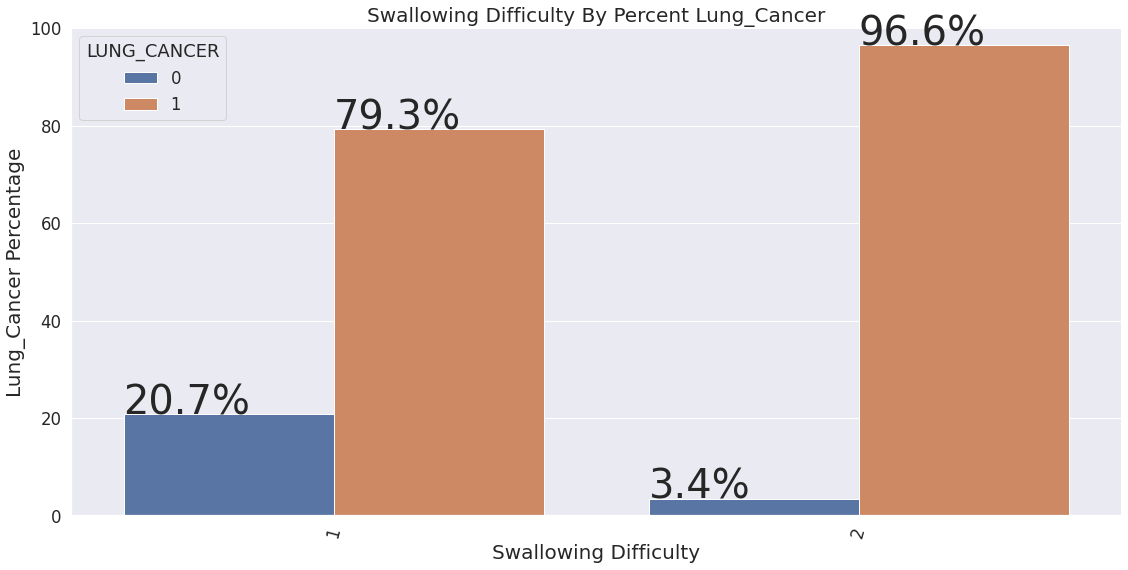

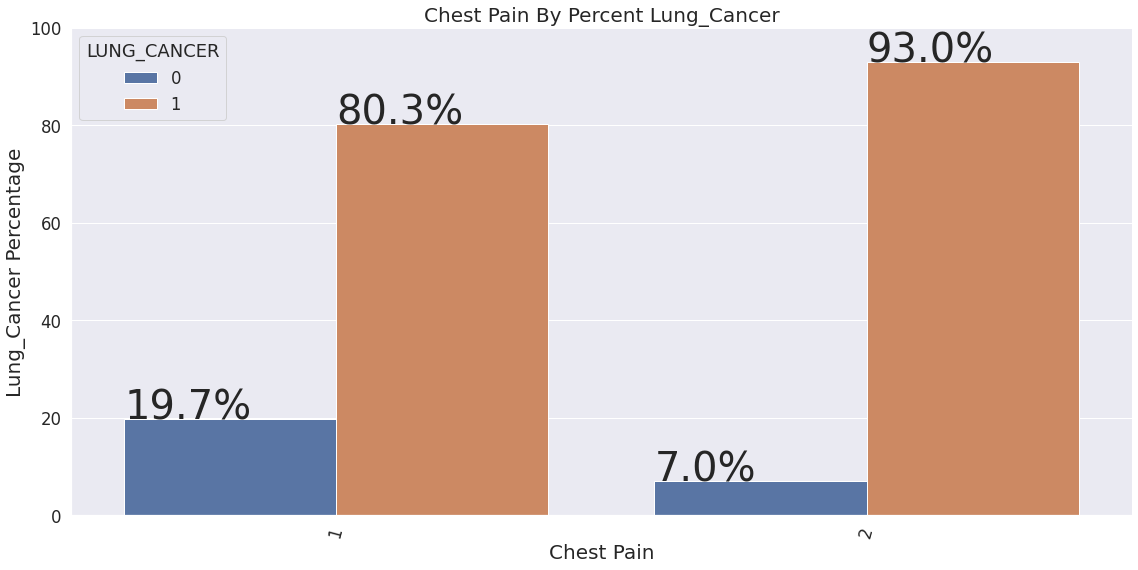

In [ ]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    plotting_percentages(df, i, 'LUNG_CANCER')

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

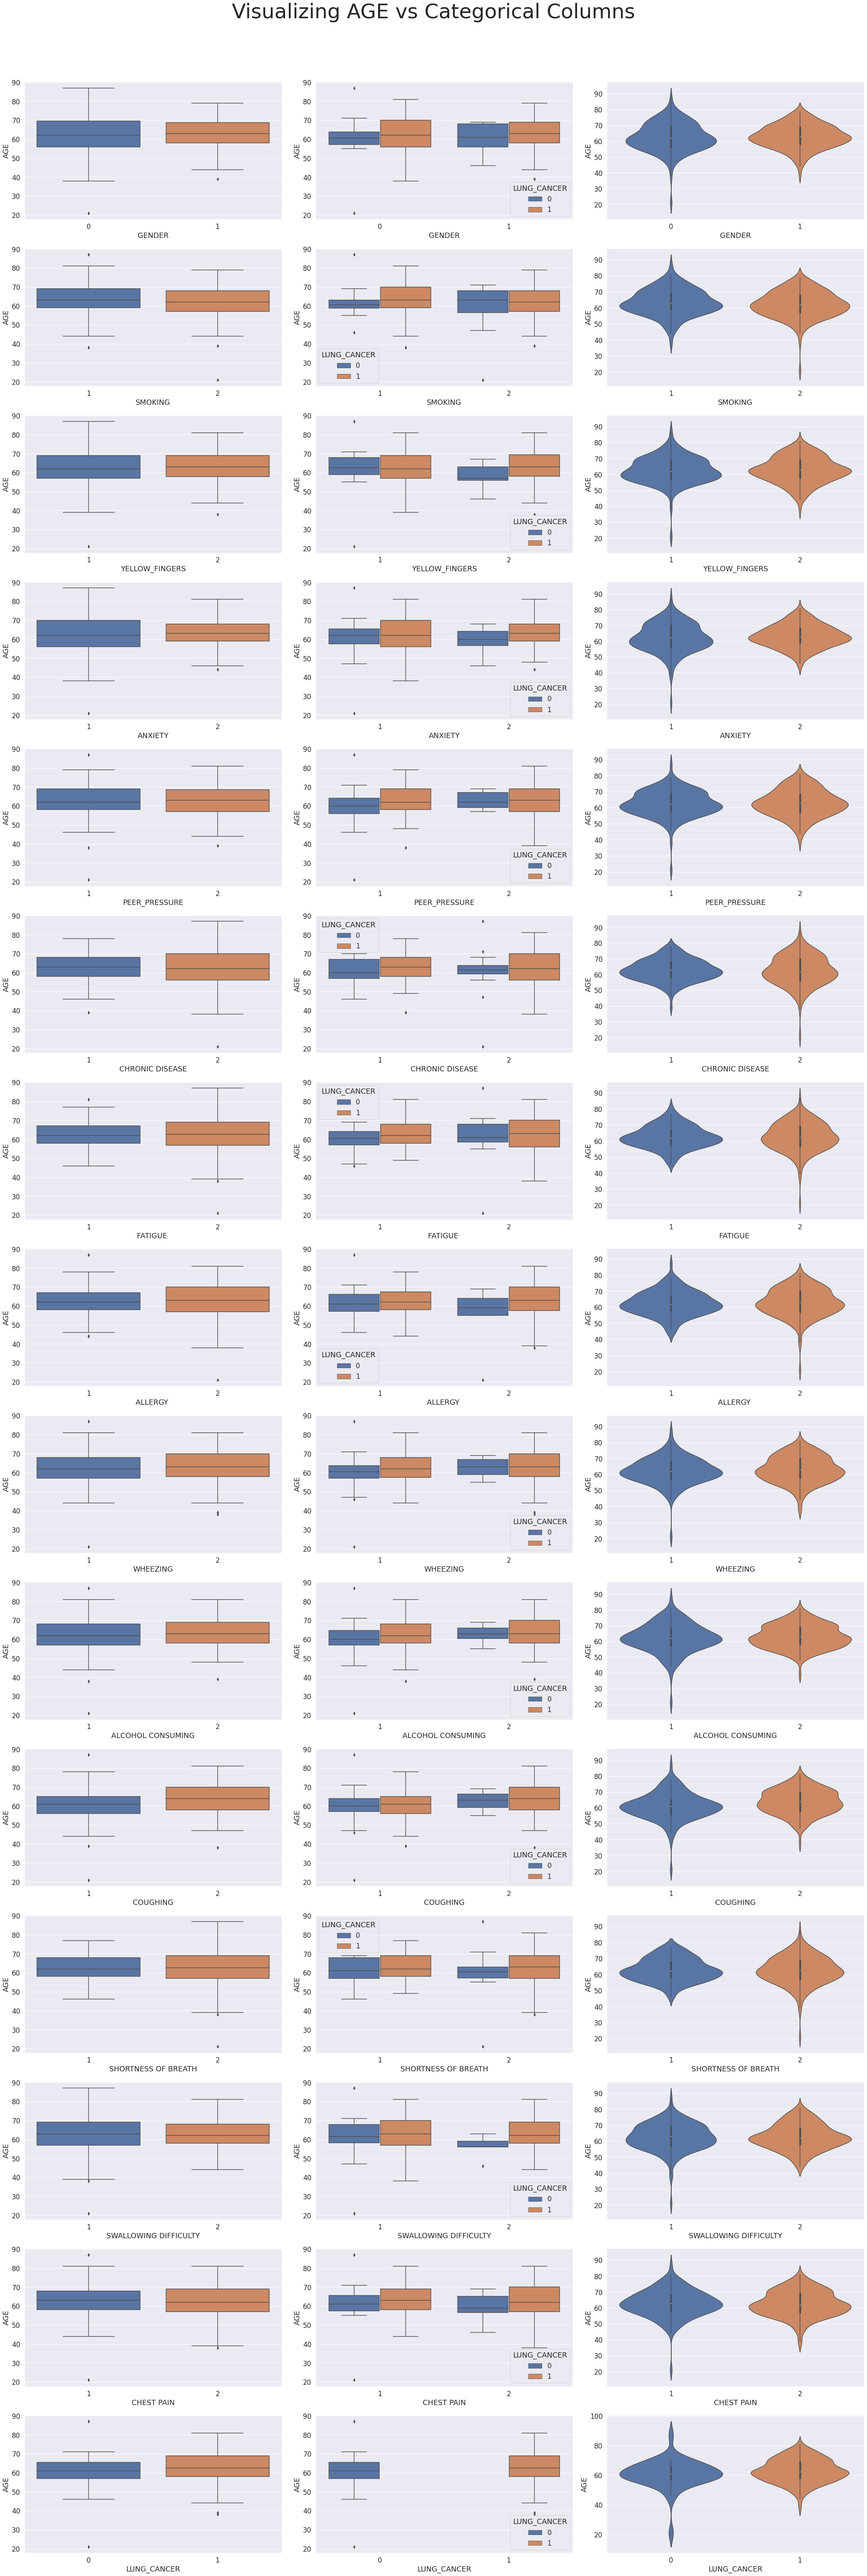

In [ ]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['LUNG_CANCER'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

# 전처리

In [15]:
from sklearn.preprocessing import LabelEncoder


LabelEncoder = LabelEncoder()


data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE"}, inplace=True)

data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,FEMALE,MALE
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


In [16]:
feature_names = data.columns[:-3].append(data.columns[-2:]).to_list()

## 상관관계

In [17]:
# plt.subplots(figsize =(16, 12))

# sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99), 
#             annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
# plt.title("Pearson Correlation Of Features\n", size=15)
# plt.xticks(rotation=90)
# plt.show()

# train_test split

In [18]:
X = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {X_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {X_test.shape}, {y_test.shape}")


Shape of training data : (220, 16), (220,)
Shape of testing data : (56, 16), (56,)


# baseline

In [19]:
from sklearn.metrics import classification_report
base = y_train.mode()[0]
baseline = [base]*len(y_train)
base_report = classification_report(y_train,baseline)
print('{}'.format(base_report))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.88      1.00      0.94       194

    accuracy                           0.88       220
   macro avg       0.44      0.50      0.47       220
weighted avg       0.78      0.88      0.83       220



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1-class의 Recall이 굉장히 높습니다. 이 모델은 대부분의 입력을 1으로 예측하는 모델이라는 뜻입니다.  

 그런데 f1 : 0.94


### baseline f1: 94

In [20]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(
    StandardScaler(),
    OrdinalEncoder(),
    #SimpleImputer(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=7,
       
    ),
)
print(pipe)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ordinalencoder', OrdinalEncoder()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='error',
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                           

# XGBoost randomserchCV

In [27]:
from scipy.stats.distributions import uniform

params = {
    "xgbclassifier__max_depth": [2, 4, 6, 8],
    "xgbclassifier__min_child_weight": [2, 4, 8],
    "xgbclassifier__learning_rate": [0.1, 0.05, 0.01],
}

In [28]:

from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    pipe,
    param_distributions=params,
    scoring="f1",
    n_iter=20,
    cv=3,
    verbose=3,
    random_state=42,
)
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[15:14:52] WARNING: ../src/learner.cc:627: 
Parameters: { "simpleimputer__strategy", "xgbclassifier__max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/3] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=8, xgbclassifier__min_child_weight=8;, score=0.935 total time=   1.2s
[15:14:53] WARNING: ../src/learner.cc:627: 
Parameters: { "simpleimputer__strategy", "xgbclassifier__max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such c

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('ordinalencoder',
                                              OrdinalEncoder(cols=[],
                                                             mapping=[])),
                                             ('simpleimputer', SimpleImputer()),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            callbacks=None,
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                      

In [29]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 F1: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.05}
최적 F1:  0.9473287470145286


In [30]:
pipe = make_pipeline(
    StandardScaler(),
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        
        
        #############################3
        simpleimputer__strategy = 'median',
        xgbclassifier__max_depth =8, #6
        learning_rate= 0.05,      
        min_child_weight=4 #4
    ),
)
print(pipe)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='error',
                               gamma=None, gpu..., grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=4, missing=nan,
                               monoton

In [31]:
pipe.fit(X_train , y_train)


[15:16:08] WARNING: ../src/learner.cc:627: 
Parameters: { "simpleimputer__strategy", "xgbclassifier__max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='error',
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.05, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=4,
                               missing=nan, monotone_constraints='()',
                               n_esti

## 성능 함수 정의, 출력


In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
 


def plot_confusion_matrix(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    plt.show()
    
def get_roc_auc(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred_proba = model.predict_proba(
            X_val_encoded, iteration_range=(0, model.best_iteration)
        )[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

    print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba))

    baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds': thresholds})
    plt.plot(
        baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline"
    )
    plt.plot(fpr, tpr, color="blue", label="Model")
    plt.scatter(fpr, tpr, color="red")
    plt.legend()
    plt.title("ROC curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    return tmp

def summarize_results(model,X_train, X_test, y_test):
    # 1. Train / Val Loss Plot
    if isinstance(model, XGBClassifier):
        results = model.evals_result()
        tgts = results["validation_0"].keys()

        for tgt in tgts:
            train_error = results["validation_0"][tgt]
            val_error = results["validation_1"][tgt]

            plt.plot(train_error, label="Train")
            plt.plot(val_error, label="validation")
            plt.ylabel(tgt)
            plt.xlabel("Model Complexity (n_estimators)")
            plt.legend()
            plt.show()

    # 2. Accuracy / Classification Report
    print("검증 정확도", model.score(X_test, y_test))

    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_test, iteration_range=(0, model.best_iteration))
        
    else:
        y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('train_classification_report\n',classification_report(y_train, y_pred_train))
    print('test_classification_report\n',classification_report(y_test, y_pred))

    # 3. ROC-AUC
    get_roc_auc(model, X_test, y_test)

    # 4. Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap='Blues')
    plt.show()

검증 정확도 0.875
train_classification_report
               precision    recall  f1-score   support

           0       0.76      0.50      0.60        26
           1       0.94      0.98      0.96       194

    accuracy                           0.92       220
   macro avg       0.85      0.74      0.78       220
weighted avg       0.92      0.92      0.92       220

test_classification_report
               precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56

ROC-AUC: 0.9659090909090909


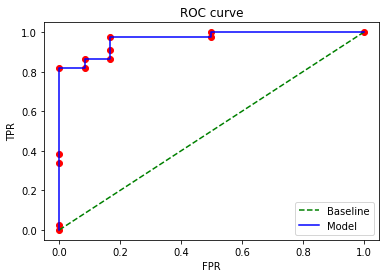

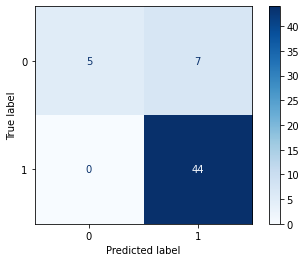

In [33]:
summarize_results(pipe,X_train, X_test, y_test)


### 0.96 0.93
### 5/44 타겟 불균형

## Class 불균형>>Class Weight를 사용해 모델을 재학습


Oversampling + Undersapmling
Oversampling의 경우 기존 데이터를 기반으로 새로운 데이터를 합성하므로, 생성된 합성 데이터들이 noisy하다는 문제가 있습니다.
이를 해결하는 방법 중 하나로 새로운 데이터를 Oversampling으로 합성한 후, 생성된 데이터들 중 노이즈가 큰 데이터들을 Undersampling으로 정리하는 방법이 있습니다.

In [34]:
#스케일러 따로
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


과적합이 심하면?

eta 값을 낮춰보자: 만약 eta값을 낮추게 된다면 num_estimators는 반대로 높여줘야 합니다.

max_depth을 낮춰보자.

min_child_weigh을 높여보자.

gamma 값을 높여보자.

In [35]:
from imblearn.over_sampling import SMOTE


#모델 따로

model =XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        
        
        #############################3
        xgbclassifier__max_depth =8, #6
        learning_rate= 0.05,      
        min_child_weight=4, #4

        scale_pos_weight=(y_test == 0).sum() / (y_test == 1).sum(), #
            
        )

X_train_sampled, y_train_sampled = SMOTE(random_state=42).fit_resample(
    X_train_scaled, y_train
)

In [36]:
# 0-class의 데이터가 1-class의 데이터 수만큼 늘어난 것을 볼 수 있습니다.
print(y_train_sampled.value_counts())
print("총개수",y_train_sampled.value_counts().sum())

1    194
0    194
Name: LUNG_CANCER, dtype: int64
총개수 388


In [37]:
watchlist = [(X_train_scaled, y_train), (X_test_scaled, y_test)] #



model.fit(X_train_scaled , 
          y_train,
        eval_set=watchlist, #
        early_stopping_rounds=50,# 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
        )


[15:17:32] WARNING: ../src/learner.cc:627: 
Parameters: { "xgbclassifier__max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-error:0.17727	validation_1-error:0.12500
[1]	validation_0-error:0.21364	validation_1-error:0.17857
[2]	validation_0-error:0.17727	validation_1-error:0.12500
[3]	validation_0-error:0.21364	validation_1-error:0.17857
[4]	validation_0-error:0.17727	validation_1-error:0.12500
[5]	validation_0-error:0.21364	validation_1-error:0.17857
[6]	validation_0-error:0.12273	validation_1-error:0.14286
[7]	validation_0-error:0.17273	validation_1-error:0.16071
[8]	validation_0-error:0.12273	validation_1-error:0.14286


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[9]	validation_0-error:0.12727	validation_1-error:0.10714
[10]	validation_0-error:0.12727	validation_1-error:0.14286
[11]	validation_0-error:0.12273	validation_1-error:0.10714
[12]	validation_0-error:0.12727	validation_1-error:0.10714
[13]	validation_0-error:0.11818	validation_1-error:0.10714
[14]	validation_0-error:0.12273	validation_1-error:0.12500
[15]	validation_0-error:0.11364	validation_1-error:0.14286
[16]	validation_0-error:0.11364	validation_1-error:0.12500
[17]	validation_0-error:0.11364	validation_1-error:0.10714
[18]	validation_0-error:0.11364	validation_1-error:0.12500
[19]	validation_0-error:0.11364	validation_1-error:0.12500
[20]	validation_0-error:0.11364	validation_1-error:0.12500
[21]	validation_0-error:0.11364	validation_1-error:0.12500
[22]	validation_0-error:0.11364	validation_1-error:0.12500
[23]	validation_0-error:0.11364	validation_1-error:0.12500
[24]	validation_0-error:0.10000	validation_1-error:0.10714
[25]	validation_0-error:0.09091	validation_1-error:0.0892

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

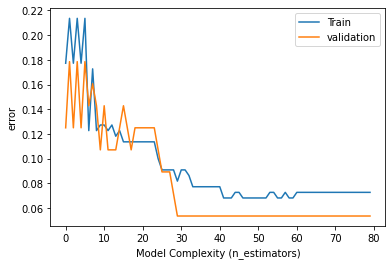

검증 정확도 0.9464285714285714
train_classification_report
               precision    recall  f1-score   support

           0       0.64      0.69      0.67        26
           1       0.96      0.95      0.95       194

    accuracy                           0.92       220
   macro avg       0.80      0.82      0.81       220
weighted avg       0.92      0.92      0.92       220

test_classification_report
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56

ROC-AUC: 0.9034090909090909


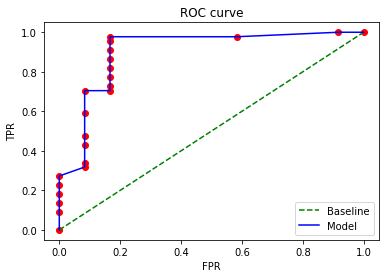

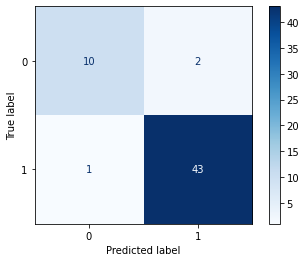

In [38]:
summarize_results(model, X_train_scaled,X_test_scaled, y_test)


## 1-class에 대한 정확도를 다소 희생하였지만, 0-class의 정확도를 향상시켰습니다.
## 10 43



# Permutation Importance

In [39]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps["xgbclassifier"], #randomforestclassifier
    scoring="f1",  
    n_iter=5,  
    random_state=42,
    
)

pipe.fit(X_train_scaled, y_train) #파이프는 위에서 이미 정의

# 스코어를 다시 계산합니다.
X_test_preprocessed = pipe[0].transform(X_test_scaled)
permuter.fit(X_test_scaled, y_test)

[15:18:27] WARNING: ../src/learner.cc:627: 
Parameters: { "simpleimputer__strategy", "xgbclassifier__max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




PermutationImportance(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='error', gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.05, max_bin=256,
                                              max_cat_to_onehot=4,
                     

Text(0.5, 1.0, 'Permutation Importance')

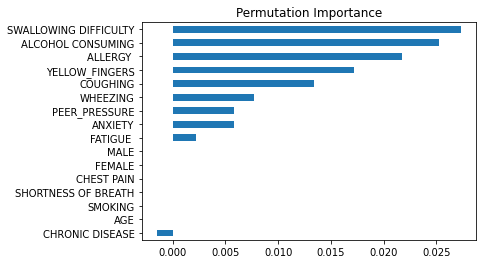

In [40]:
feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

In [41]:
df=eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)
df

Weight,Feature
0.0274 ± 0.0155,SWALLOWING DIFFICULTY
0.0252 ± 0.0160,ALCOHOL CONSUMING
0.0218 ± 0.0088,ALLERGY
0.0172 ± 0.0076,YELLOW_FINGERS
0.0134 ± 0.0093,COUGHING
0.0077 ± 0.0077,WHEEZING
0.0058 ± 0.0095,PEER_PRESSURE
0.0058 ± 0.0095,ANXIETY
0.0022 ± 0.0145,FATIGUE
0 ± 0.0000,MALE


In [42]:
df_permuter=pd.DataFrame(pi).reset_index()
df_permuter.columns =['feature', 'importance']
df_permuter.sort_values(by='importance', ascending=False, inplace =True)
df_permuter

,feature,importance
15,SWALLOWING DIFFICULTY,0.027351
14,ALCOHOL CONSUMING,0.025228
13,ALLERGY,0.021767
12,YELLOW_FINGERS,0.017209
11,COUGHING,0.013429
10,WHEEZING,0.007719
8,ANXIETY,0.005789
9,PEER_PRESSURE,0.005789
7,FATIGUE,0.002206
1,AGE,0.000000


In [43]:
permuter_top = df_permuter[df_permuter['importance']>df_permuter['importance'].mean()]
permuter_top

,feature,importance
15,SWALLOWING DIFFICULTY,0.027351
14,ALCOHOL CONSUMING,0.025228
13,ALLERGY,0.021767
12,YELLOW_FINGERS,0.017209
11,COUGHING,0.013429


In [44]:
features_top=permuter_top["feature"].to_list()
features_top

['SWALLOWING DIFFICULTY',
 'ALCOHOL CONSUMING',
 'ALLERGY ',
 'YELLOW_FINGERS',
 'COUGHING']

In [45]:
X_train_top = X_train[features_top]
y_train_top = y_train
X_test_top = X_test[features_top]
y_test_top = y_test

print(X_train_top.shape)
print(y_train.shape)
print(X_test_top.shape)
print(y_test.shape)

(220, 5)
(220,)
(56, 5)
(56,)


## 상위 특성만

In [47]:
pipe1 = make_pipeline(
    StandardScaler(),
    OrdinalEncoder(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=7,
        
    ),
)
print(pipe1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ordinalencoder', OrdinalEncoder()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='error',
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                           

In [48]:
from scipy.stats.distributions import uniform

params = {
    "xgbclassifier__max_depth": [2, 4, 6, 8],# 트리의 최대 깊이.일반적으로 3-10
    "xgbclassifier__min_child_weight": [2, 4, 8],#over-fitting vs under-fitting을 조정하기 위한 파라미터.너무 큰 값이 주어지면 under-fitting.
    "xgbclassifier__learning_rate": [0.1,0.05,0.01],
    
}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    pipe1,
    param_distributions=params,
    scoring="f1",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)
randomized_search.fit(X_train_top, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=8, xgbclassifier__min_child_weight=8;, score=0.935 total time=   0.7s
[CV 2/3] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=8, xgbclassifier__min_child_weight=8;, score=0.942 total time=   0.7s
[CV 3/3] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=8, xgbclassifier__min_child_weight=8;, score=0.934 total time=   0.7s
[CV 1/3] END xgbclassifier__learning_rate=0.05, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.947 total time=   0.7s
[CV 2/3] END xgbclassifier__learning_rate=0.05, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.933 total time=   0.7s
[CV 3/3] END xgbclassifier__learning_rate=0.05, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.939 total time=   0.7s
[CV 1/3] END xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=2, xgbcl

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
   

In [51]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 F1: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__min_child_weight': 4, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.05}
최적 F1:  0.9400318979266348


## 최적의 파라미터 fit

In [65]:
pipe1_setted = make_pipeline(
    StandardScaler(),
    OrdinalEncoder(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        
        #############################3
        xgbclassifier__max_depth =6, #6
        min_child_weight=4, #4
        xgbclassifier__learning_rate=0.1
    ),
)
print(pipe1_setted)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ordinalencoder', OrdinalEncoder()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='error',
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=4, missing=nan,
                               monotone_constraints=None, n_estimators=200,
         

In [66]:
pipe1_setted.fit(X_train_top , y_train)


[15:32:54] WARNING: ../src/learner.cc:627: 
Parameters: { "xgbclassifier__learning_rate", "xgbclassifier__max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='error',
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=4,
                               missing=nan, monotone_constraints='()',
                               n_estimators=200, n_jobs=-1, num_parallel_tree=1,
 

In [67]:
# 타겟 불균형 해결

In [68]:
#스케일러, 인코더 따로
scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

X_train_top_scaled = pd.DataFrame(X_train_top_scaled, columns = X_train_top.columns)
X_test_top_scaled = pd.DataFrame(X_test_top_scaled, columns = X_test_top.columns)

encoder =OrdinalEncoder()
X_train_top_scaled_encoded=encoder.fit_transform(X_train_top_scaled)
X_test_top_scaled_encoded=encoder.transform(X_test_top_scaled)

In [71]:
from imblearn.over_sampling import SMOTE


#모델 따로

model =XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        
        #############################3
        xgbclassifier__max_depth =6, #6
        min_child_weight=4, #4
        learning_rate=0.1,

            scale_pos_weight=(y_test == 0).sum() / (y_test == 1).sum(), #
            
        )

X_train_top_sampled, y_train_top_sampled= SMOTE(random_state=42).fit_resample(
    X_train_top_scaled_encoded, y_train_top
)

#X_train_top_scaled_encoded, y_train_top_sampled, X_test_top_scaled_encoded, y_test_top

In [72]:
# 1-class의 데이터가 0-class의 데이터 수만큼 늘어난 것을 볼 수 있습니다.
y_train_top_sampled.value_counts()

1    194
0    194
Name: LUNG_CANCER, dtype: int64

In [73]:
watchlist = [(X_train_top_sampled, y_train_top_sampled), (X_test_top_scaled_encoded, y_test_top)] #



model.fit(X_train_top_sampled , 
          y_train_top_sampled,
        eval_set=watchlist, #
        early_stopping_rounds=50,# 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
        )


[15:35:49] WARNING: ../src/learner.cc:627: 
Parameters: { "xgbclassifier__max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-error:0.19588	validation_1-error:0.37500
[1]	validation_0-error:0.19588	validation_1-error:0.37500
[2]	validation_0-error:0.19588	validation_1-error:0.37500
[3]	validation_0-error:0.19588	validation_1-error:0.37500
[4]	validation_0-error:0.19588	validation_1-error:0.37500
[5]	validation_0-error:0.19588	validation_1-error:0.37500
[6]	validation_0-error:0.19588	validation_1-error:0.37500
[7]	validation_0-error:0.19588	validation_1-error:0.37500
[8]	validation_0-error:0.19588	validation_1-error:0.37500
[9]	validation_0-error:0.19588	validation_1-error:0.37500
[10]	validation_0-error:0.19588	validation_1-

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[13]	validation_0-error:0.19588	validation_1-error:0.37500
[14]	validation_0-error:0.19588	validation_1-error:0.37500
[15]	validation_0-error:0.19588	validation_1-error:0.37500
[16]	validation_0-error:0.19588	validation_1-error:0.37500
[17]	validation_0-error:0.19588	validation_1-error:0.37500
[18]	validation_0-error:0.17526	validation_1-error:0.28571
[19]	validation_0-error:0.17526	validation_1-error:0.28571
[20]	validation_0-error:0.17526	validation_1-error:0.28571
[21]	validation_0-error:0.17526	validation_1-error:0.28571
[22]	validation_0-error:0.17526	validation_1-error:0.28571
[23]	validation_0-error:0.17526	validation_1-error:0.28571
[24]	validation_0-error:0.17526	validation_1-error:0.28571
[25]	validation_0-error:0.17526	validation_1-error:0.28571
[26]	validation_0-error:0.17526	validation_1-error:0.28571
[27]	validation_0-error:0.17526	validation_1-error:0.28571
[28]	validation_0-error:0.17526	validation_1-error:0.28571
[29]	validation_0-error:0.15464	validation_1-error:0.250

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

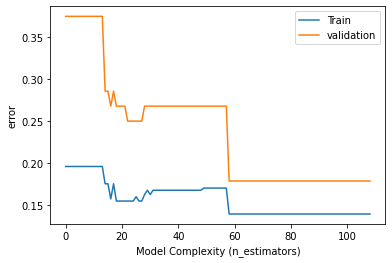

검증 정확도 0.8214285714285714
train_classification_report
               precision    recall  f1-score   support

           0       0.79      0.98      0.88       194
           1       0.98      0.74      0.84       194

    accuracy                           0.86       388
   macro avg       0.88      0.86      0.86       388
weighted avg       0.88      0.86      0.86       388

test_classification_report
               precision    recall  f1-score   support

           0       0.44      0.92      0.59        12
           1       0.97      0.68      0.80        44

    accuracy                           0.73        56
   macro avg       0.70      0.80      0.70        56
weighted avg       0.85      0.73      0.76        56

ROC-AUC: 0.9034090909090909


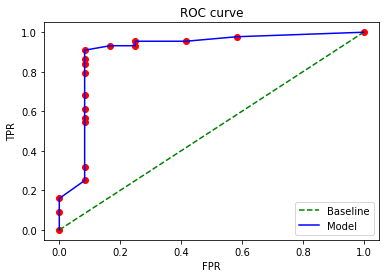

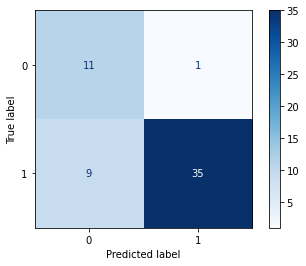

In [60]:
#성능확인
def summarize_results_1(model, X_test, y_test):
    # 1. Train / Val Loss Plot
    if isinstance(model, XGBClassifier):
        results = model.evals_result()
        tgts = results["validation_0"].keys()

        for tgt in tgts:
            train_error = results["validation_0"][tgt]
            val_error = results["validation_1"][tgt]

            plt.plot(train_error, label="Train")
            plt.plot(val_error, label="validation")
            plt.ylabel(tgt)
            plt.xlabel("Model Complexity (n_estimators)")
            plt.legend()
            plt.show()

    # 2. Accuracy / Classification Report
    print("검증 정확도", model.score(X_test, y_test))

    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_test, iteration_range=(0, model.best_iteration))
        
    else:
        y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_top_sampled)###############################################################수정
    print('train_classification_report\n',classification_report(y_train_top_sampled, y_pred_train))############################33
    print('test_classification_report\n',classification_report(y_test, y_pred))

    # 3. ROC-AUC
    get_roc_auc(model, X_test, y_test)

    # 4. Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap='Blues')
    plt.show()
summarize_results_1(model, X_test_top_scaled, y_test_top)

#X_train_top_scaled_encoded, y_train_top_sampled, X_test_top_scaled_encoded, y_test_top

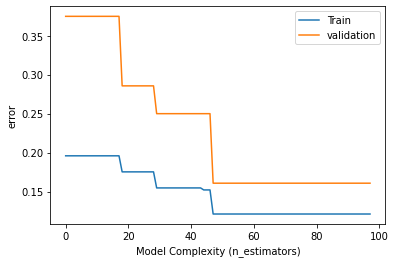

검증 정확도 0.8392857142857143
train_classification_report
               precision    recall  f1-score   support

           0       0.35      0.92      0.51        26
           1       0.99      0.77      0.86       194

    accuracy                           0.79       220
   macro avg       0.67      0.85      0.68       220
weighted avg       0.91      0.79      0.82       220

test_classification_report
               precision    recall  f1-score   support

           0       0.46      0.92      0.61        12
           1       0.97      0.70      0.82        44

    accuracy                           0.75        56
   macro avg       0.71      0.81      0.71        56
weighted avg       0.86      0.75      0.77        56

ROC-AUC: 0.9034090909090909


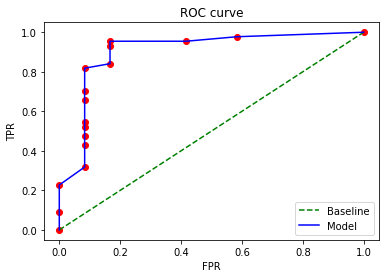

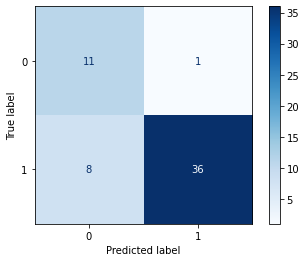

In [74]:
summarize_results(model, X_train_top_scaled_encoded,X_test_top_scaled_encoded, y_test_top)
#def summarize_results(model,X_train, X_test, y_test):
#X_train_top_scaled_encoded, y_train_top_sampled, X_test_top_scaled_encoded, y_test_top

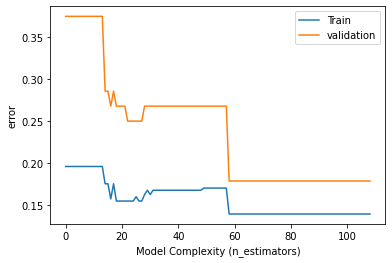

검증 정확도 0.8214285714285714
train_classification_report
               precision    recall  f1-score   support

           0       0.79      0.98      0.88       194
           1       0.98      0.74      0.84       194

    accuracy                           0.86       388
   macro avg       0.88      0.86      0.86       388
weighted avg       0.88      0.86      0.86       388

test_classification_report
               precision    recall  f1-score   support

           0       0.44      0.92      0.59        12
           1       0.97      0.68      0.80        44

    accuracy                           0.73        56
   macro avg       0.70      0.80      0.70        56
weighted avg       0.85      0.73      0.76        56

ROC-AUC: 0.9034090909090909


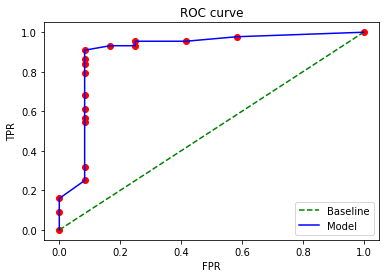

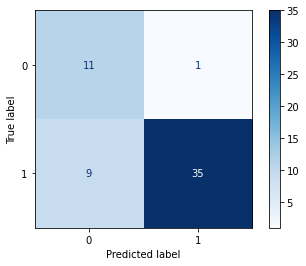

In [63]:
summarize_results_1(model,X_test_top_scaled, y_test_top)
